In [1]:
import pygmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
PPfile = '/Volumes/home/Research/STEP/12_PiercePoint/non-null/PP100.csv'
dp = pd.read_csv(PPfile)

In [11]:
dp_ = dp[dp['plat']<=42][dp['plat']>=41]

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_82025/3396870383.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dp_ = dp[dp['plat']<=42][dp['plat']>=41]


In [4]:
Lithnc = '/Volumes/home/Research/GMT/LithoThickness/LithThickness.nc'

coast [WARNING]: Length <unit> t not supported - revert to default unit [point]
coast [WARNING]: 0.5/thinnes not a valid number and may not be decoded properly.


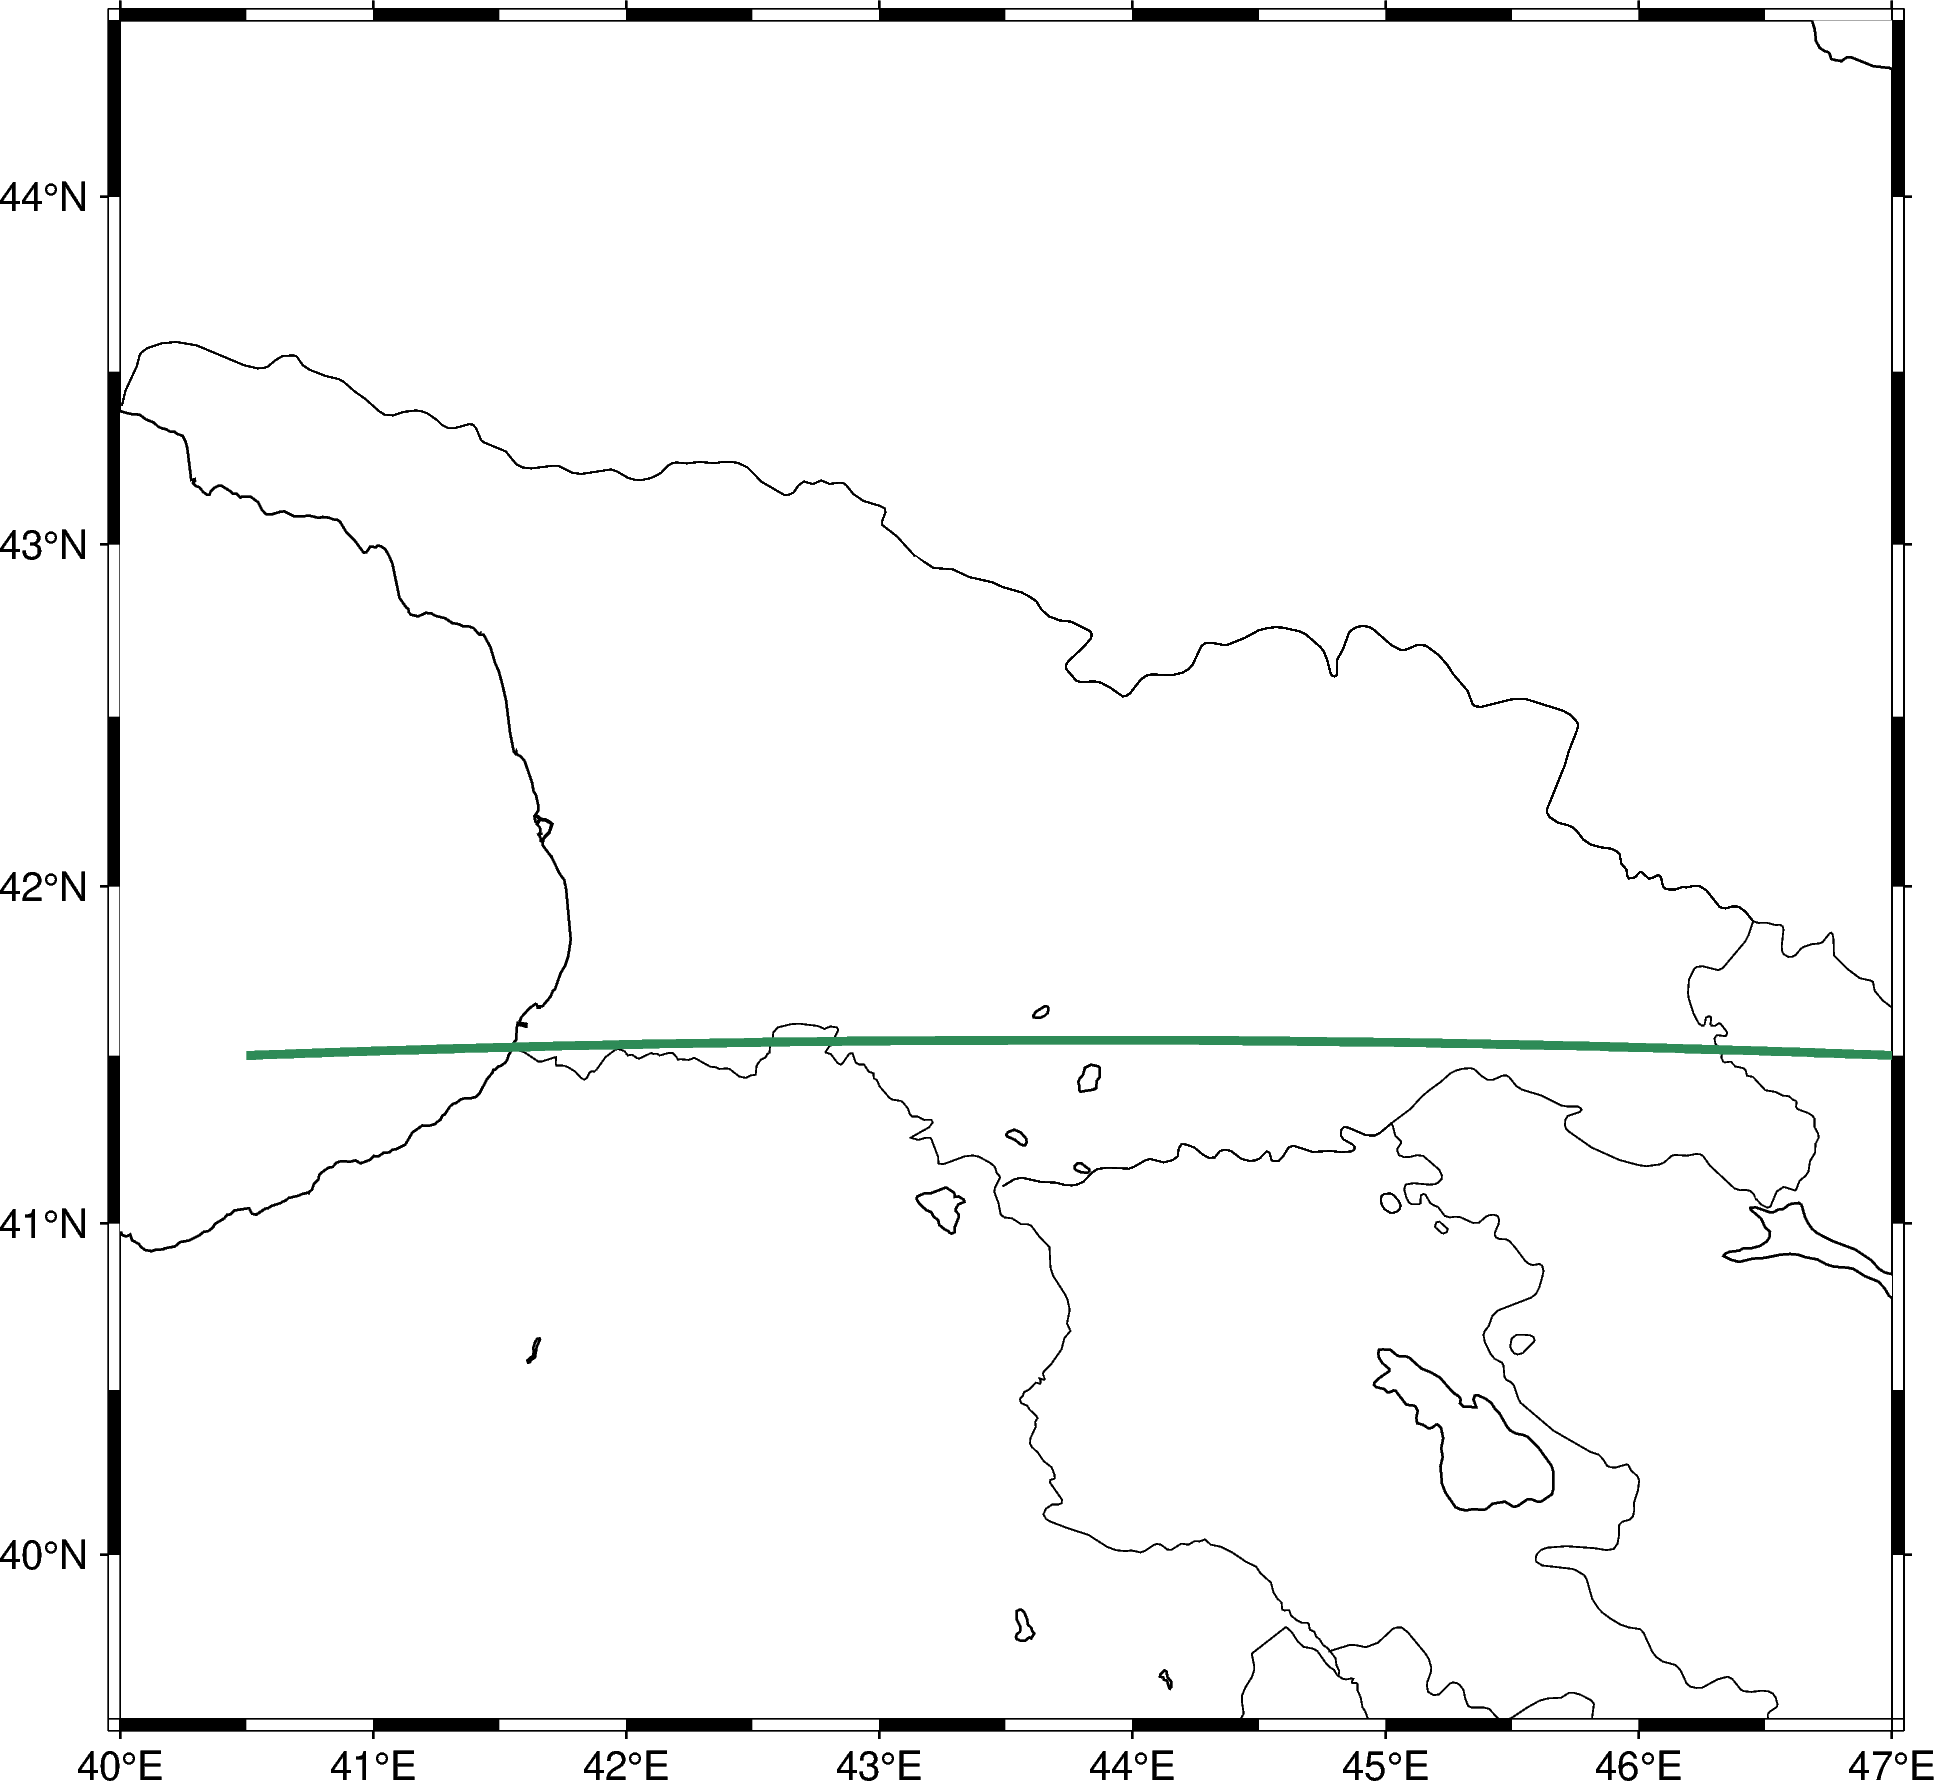

In [7]:
figmap = pygmt.Figure()
regvals = [40, 47, 39.5, 44.5]
figmap.basemap(region=regvals, projection="M15c", frame = ['x1f0.5', 'y1f0.5', 'nSeW'])
figmap.coast(resolution = 'h', shorelines ='0.5/thinnest,black', water='white', borders = '1/0.3p')


figmap.plot(x=points1.r, y=points1.s, pen="2p,seagreen")
figmap.show()

In [6]:
points1 = pygmt.project(center=[40.5, 41.5], endpoint=[47, 41.5], generate=0.05,unit=True)
Lithfile = pygmt.grdtrack(points=points1,grid=Lithnc,newcolname="Thickness")

In [12]:
from obspy.geodetics.base import gps2dist_azimuth
distlist=[]
for ii in range(len(dp_)):
    lat = dp_['plat'].values[ii]
    lon = dp_['plon'].values[ii]
    dist, az,baz=gps2dist_azimuth(41.5,40.5,lat,lon)
    distlist.append(dist/1000)

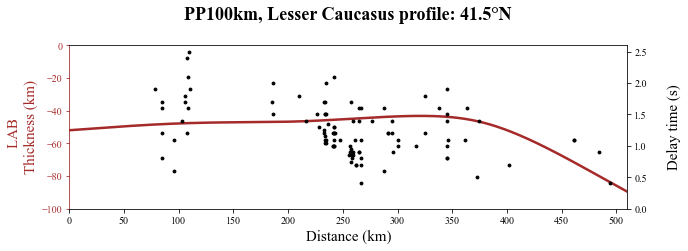

In [15]:
plt.rc('font',family='Times New Roman')
maxdist = max(Lithfile['p'])
fig = plt.figure(figsize=(10,3))
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax1.plot(Lithfile['p'],-1*Lithfile['Thickness'],c='brown',lw=2.5)
ax1.set_xlim(0,510)
ax1.set_ylim(-100,0)
ax1.set_xticks(np.arange(0,510,50))
ax1.set_ylabel('LAB   \nThickness (km)', fontsize=15,color="brown")
ax1.spines["left"].set_color("brown") 
ax1.tick_params(axis='y', colors="brown")


ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.set_xlim(0,510)
ax2.set_ylim(0,2.6)
ax2.set_ylabel('\nDelay time (s)', fontsize=15)

ax2.set_xticks([])
ax2.scatter(distlist,dp_['dt'],s=8,color='k')
ax1.set_xlabel('Distance (km)',  fontsize=15)
ax1.set_title('PP100km, Lesser Caucasus profile: 41.5°N\n',  fontsize=18, fontweight='bold')
fig.savefig('ProfileLC_delaytime_PP100.png',dpi=200,bbox_inches='tight')
fig.savefig('ProfileLC_delaytime_PP100.pdf',bbox_inches='tight')